In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from typing import List,Any
import numpy as np
from sklearn import linear_model,model_selection, metrics


In [2]:
dsPacientes = pd.read_csv('dados_pacientes.csv',sep=';',encoding='latin')

In [3]:
dsEstados = pd.read_csv('estados_brasileiros.csv',sep=';',encoding='latin')

In [4]:
dsMedicos = pd.read_excel('dados_medicos.xlsx')

In [5]:
dsPacientes.head()

,id_cliente,id_estado,idade,genero,estado Civil,renda,nivel_educacao
0,1,21,24,Feminino,Divorciado,8672.21,Superior
1,2,14,60,Feminino,Casado,2946.06,Superior
2,3,26,23,Feminino,Solteiro,5872.48,Médio
3,4,18,51,Masculino,Casado,7871.49,Superior
4,5,4,51,Outro,Viúvo,6033.31,Superior


In [6]:
dsEstados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,AC,Brasil
1,2,Alagoas,AL,Brasil
2,3,Amapá,AP,Brasil
3,4,Amazonas,AM,Brasil
4,5,Bahia,BA,Brasil


In [7]:
dsMedicos.head()

,id_cliente,peso,colesterol
0,1,102.0,111
1,2,115.0,135
2,3,115.0,136
3,4,140.0,167
4,5,130.0,158


In [8]:

dsGeral = dsPacientes.join(dsEstados.set_index('id_estado'),on='id_estado')

In [9]:
dsGeral.head(5)

,id_cliente,id_estado,idade,genero,estado Civil,renda,nivel_educacao,estado,sigla_estado,pais
0,1,21,24,Feminino,Divorciado,8672.21,Superior,Rio Grande do Sul,RS,Brasil
1,2,14,60,Feminino,Casado,2946.06,Superior,Pará,PA,Brasil
2,3,26,23,Feminino,Solteiro,5872.48,Médio,Sergipe,SE,Brasil
3,4,18,51,Masculino,Casado,7871.49,Superior,Piauí,PI,Brasil
4,5,4,51,Outro,Viúvo,6033.31,Superior,Amazonas,AM,Brasil


In [10]:
dsGeral.estado.nunique()

27

In [11]:
#Qual é a idade média das pessoas que residem no estado de Minas Gerais?
round(dsGeral[dsGeral['estado']=='Minas Gerais'].idade.median(),2)


43.0

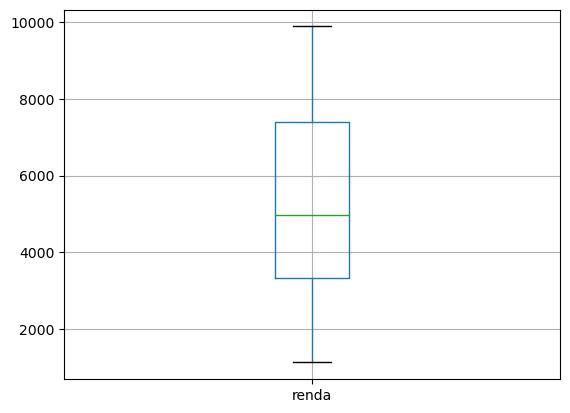

In [12]:
dsGeral[dsGeral['estado']=='Minas Gerais'].boxplot(['renda'])
plt.show()

In [13]:
dsGeral[dsGeral['estado']=='Minas Gerais'].groupby(by="genero").agg('renda').describe()

,count,mean,std,min,25%,50%,75%,max
genero,,,,,,,,
Feminino,17.0,4594.180588,2344.126811,1178.12,3337.8300,4206.370,6154.5700,8989.50
Masculino,12.0,5044.618333,2950.240942,1137.73,2519.6425,5638.705,6717.2400,9593.31
Outro,12.0,6499.575833,2671.797016,1736.27,4789.2525,6456.195,8910.2225,9881.47


In [14]:
#Crie um gráfico de caixa (boxplot) para representar as idades das pessoas que possuem 
#níveis de educação superior, categorizadas por seu estado civil. Em seguida, escolha o 
#gráfico que melhor representa essa distribuição.
dsGeral[dsGeral['nivel_educacao']=='Superior'].groupby('estado Civil').agg('idade').describe()

,count,mean,std,min,25%,50%,75%,max
estado Civil,,,,,,,,
Casado,90.0,41.977778,15.878031,18.0,25.25,45.5,55.00,65.0
Divorciado,88.0,42.704545,13.641687,18.0,30.75,44.5,54.25,65.0
Solteiro,87.0,42.689655,13.852470,18.0,32.00,44.0,54.00,65.0
Viúvo,98.0,43.622449,13.762728,19.0,34.00,43.0,56.00,65.0


In [15]:
aux = dsGeral[dsGeral['nivel_educacao']=='Superior'].groupby('estado Civil').agg('idade')

In [16]:
aux.value_counts()

estado Civil  idade
Casado        21       5
              24       5
              52       5
              62       5
              19       4
                      ..
Viúvo         45       1
              46       1
              49       1
              50       1
              53       1
Name: idade, Length: 164, dtype: int64

In [17]:
def segmentaEstCivil(estCivil:str,nivelEdu=str,ds=type[object])-> Any:
    dsGeralSuperior = ds[ds['nivel_educacao']==nivelEdu]
    dsGeralSuperiorCasado = dsGeralSuperior.where(dsGeralSuperior['estado Civil']==estCivil).dropna()
    
    return dsGeralSuperiorCasado

In [18]:
dsGeral[dsGeral['nivel_educacao']=='Superior']['estado Civil']

0      Divorciado
1          Casado
3          Casado
4           Viúvo
6           Viúvo
          ...    
981      Solteiro
983      Solteiro
984         Viúvo
986         Viúvo
988      Solteiro
Name: estado Civil, Length: 363, dtype: object

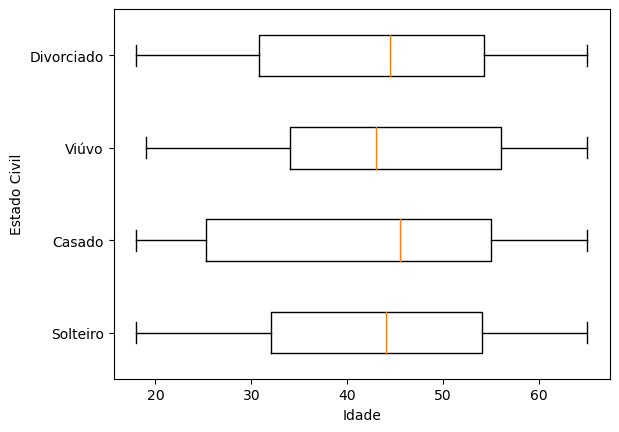

In [19]:
bpltCasado = segmentaEstCivil(estCivil='Casado',nivelEdu='Superior',ds=dsGeral)
bpltDivoreciado = segmentaEstCivil(estCivil='Divorciado',nivelEdu='Superior',ds=dsGeral)
bpltViuvo = segmentaEstCivil(estCivil='Viúvo',nivelEdu='Superior',ds=dsGeral)
bpltSolteiro = segmentaEstCivil(estCivil='Solteiro',nivelEdu='Superior',ds=dsGeral)
plt.boxplot([bpltSolteiro.idade,bpltCasado.idade, bpltViuvo.idade,bpltDivoreciado.idade], vert=False,labels=['Solteiro','Casado','Viúvo','Divorciado'])
plt.xlabel('Idade')
plt.ylabel('Estado Civil')
plt.show()

In [20]:
bpltCasado.idade.min(), bpltViuvo.idade.min(),bpltDivoreciado.idade.min(),bpltSolteiro.idade.min()

(18.0, 19.0, 18.0, 18.0)

In [21]:
bpltCasado.idade.median(), bpltViuvo.idade.median(),bpltDivoreciado.idade.median(),bpltSolteiro.idade.median()

(45.5, 43.0, 44.5, 44.0)

In [22]:

dsGeralMedicos = dsMedicos.join(dsGeral.set_index('id_cliente'),on='id_cliente')

In [23]:
dsGeralMedicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_cliente      547 non-null    int64  
 1   peso            542 non-null    float64
 2   colesterol      547 non-null    int64  
 3   id_estado       547 non-null    int64  
 4   idade           547 non-null    int64  
 5   genero          547 non-null    object 
 6   estado Civil    547 non-null    object 
 7   renda           547 non-null    float64
 8   nivel_educacao  547 non-null    object 
 9   estado          547 non-null    object 
 10  sigla_estado    547 non-null    object 
 11  pais            547 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 51.4+ KB


In [24]:
dsGeralMedicos['nivel_educacao'].value_counts()

Superior       205
Fundamental    179
Médio          163
Name: nivel_educacao, dtype: int64

In [53]:
dsGeralMedicos.groupby(by='nivel_educacao').agg('colesterol').describe()


,count,mean,std,min,25%,50%,75%,max
nivel_educacao,,,,,,,,
Fundamental,179.0,173.418994,37.652281,102.0,142.5,172.0,208.0,235.0
Médio,163.0,167.245399,40.243716,102.0,131.0,167.0,206.0,232.0
Superior,205.0,170.360976,39.530039,102.0,136.0,169.0,208.0,235.0


In [59]:
dsGeralMedicos.groupby(by='nivel_educacao').agg('colesterol').median()

nivel_educacao
Fundamental    172.0
Médio          167.0
Superior       169.0
Name: colesterol, dtype: float64

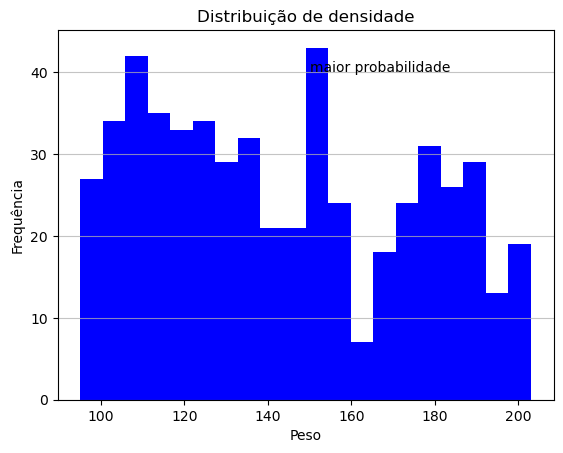

In [78]:
plt.hist(dsGeralMedicos.peso,bins=20,color='b')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Peso')
plt.ylabel('Frequência')
plt.title('Distribuição de densidade')
plt.text(150, 40, r'maior probabilidade')
plt.show()

In [56]:
dsGeralMedicos.groupby(by='nivel_educacao').agg('colesterol')

In [83]:
dsGeralMedicos[dsGeralMedicos.renda==dsGeralMedicos.renda.max()]

,id_cliente,peso,colesterol,id_estado,idade,genero,estado Civil,renda,nivel_educacao,estado,sigla_estado,pais
216,217,203.0,235,12,31,Outro,Casado,9989.72,Superior,Mato Grosso do Sul,MS,Brasil


In [26]:
dsEstados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          27 non-null     object
dtypes: int64(1), object(3)
memory usage: 996.0+ bytes


In [27]:
dsPacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_cliente      1000 non-null   int64  
 1   id_estado       1000 non-null   int64  
 2   idade           1000 non-null   int64  
 3   genero          1000 non-null   object 
 4   estado Civil    1000 non-null   object 
 5   renda           1000 non-null   float64
 6   nivel_educacao  1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [28]:
dsMedicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 12.9 KB


In [29]:
dsPacientes['genero']

0       Feminino
1       Feminino
2       Feminino
3      Masculino
4          Outro
         ...    
995     Feminino
996     Feminino
997     Feminino
998        Outro
999     Feminino
Name: genero, Length: 1000, dtype: object

In [30]:
def vsBoxplot(ds:List,col:List,rend=True)->None:
    ds.boxplot(column=col)
    return rend

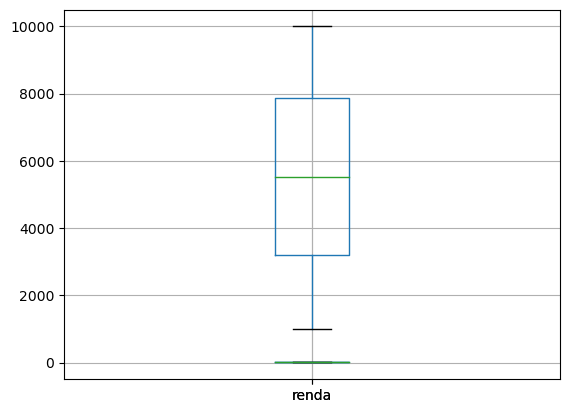

In [31]:
vsBoxplot(dsPacientes,['id_estado'])
vsBoxplot(dsPacientes,['renda'])
plt.show()

In [32]:
dsPacientes['estado Civil'].unique()

array(['Divorciado', 'Casado', 'Solteiro', 'Viúvo'], dtype=object)

In [33]:
class VerificadorCategorias():
    
    def __init__(self):
        self.conjunto=None
    
    def _verificadorCategorias(self,ds:List, coluna:str, categorias:List) -> Any:
        """
            Verifica quais categorias estão presentes nas instancia do dataset e caso essa 
            instância não faça parte da regra de negocio ou esteja duplicada por está está 
            como uma string Capitalizada.

            Caso tudo ocorra como previsto retorna True ou seja 1;
        """
        self.conjunto = set(ds[coluna].unique().tolist())

        if not (self.conjunto != set(categorias)):
            return 1
        else: return conjunto.difference(categorias);
    

    def resultadoVerificacao(cls,ds:List, coluna:str, categorias:List)->None:
        if cls._verificadorCategorias(ds, coluna, categorias):
            print(f'(Ok) -- > Feature {coluna.upper()} contém todas as categorias prevista na regra de negocio.\n')

        else: print('Garrou'); 
        

    

In [34]:
vrf = VerificadorCategorias()
vrf.resultadoVerificacao(dsPacientes, 'genero', ['Masculino','Feminino','Outro'])
vrf.resultadoVerificacao(dsPacientes, 'estado Civil', ['Divorciado', 'Casado', 'Solteiro', 'Viúvo'])

(Ok) -- > Feature GENERO contém todas as categorias prevista na regra de negocio.

(Ok) -- > Feature ESTADO CIVIL contém todas as categorias prevista na regra de negocio.



In [35]:
dsPacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_cliente      1000 non-null   int64  
 1   id_estado       1000 non-null   int64  
 2   idade           1000 non-null   int64  
 3   genero          1000 non-null   object 
 4   estado Civil    1000 non-null   object 
 5   renda           1000 non-null   float64
 6   nivel_educacao  1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [36]:
np.issubdtype(dsPacientes['idade'],np.integer)

True

In [37]:
dsMedicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 12.9 KB


In [38]:
mediaMedicoPeso = round(dsMedicos['peso'].mean(),2)
mediaMedicoPeso 

143.44

In [39]:
dsMedicos.fillna(mediaMedicoPeso,inplace=True)

In [84]:
dsMedicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        547 non-null    float64
 2   colesterol  547 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 12.9 KB


In [86]:
dsGeralMedicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_cliente      547 non-null    int64  
 1   peso            542 non-null    float64
 2   colesterol      547 non-null    int64  
 3   id_estado       547 non-null    int64  
 4   idade           547 non-null    int64  
 5   genero          547 non-null    object 
 6   estado Civil    547 non-null    object 
 7   renda           547 non-null    float64
 8   nivel_educacao  547 non-null    object 
 9   estado          547 non-null    object 
 10  sigla_estado    547 non-null    object 
 11  pais            547 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 51.4+ KB


In [88]:
dsGeralMedicos.fillna(mediaMedicoPeso,inplace=True)

In [89]:
dsGeralMedicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_cliente      547 non-null    int64  
 1   peso            547 non-null    float64
 2   colesterol      547 non-null    int64  
 3   id_estado       547 non-null    int64  
 4   idade           547 non-null    int64  
 5   genero          547 non-null    object 
 6   estado Civil    547 non-null    object 
 7   renda           547 non-null    float64
 8   nivel_educacao  547 non-null    object 
 9   estado          547 non-null    object 
 10  sigla_estado    547 non-null    object 
 11  pais            547 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 51.4+ KB


In [41]:

dsMedicosTreinamento_x, dsMedicosTeste_x, dsMedicosTreinamento_y, dsMedicosTeste_y = model_selection.train_test_split(dsMedicos['peso'],dsMedicos['colesterol'], random_state=0, test_size=.2)

In [42]:
dsMedicosTreinamento_x= dsMedicosTreinamento_x[:,None]

/tmp/ipykernel_28533/2585164475.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dsMedicosTreinamento_x= dsMedicosTreinamento_x[:,None]


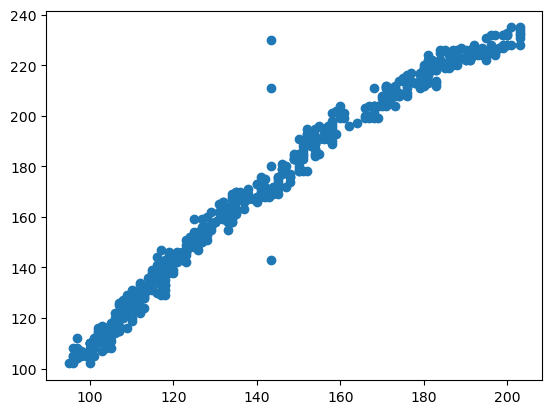

In [91]:
plt.scatter(x=dsMedicos.peso,y=dsMedicos.colesterol)
plt.show()

In [93]:
reg = linear_model.LinearRegression()

In [94]:
reg.fit(dsMedicosTreinamento_x, dsMedicosTreinamento_y)

LinearRegression()

In [95]:
reg.predict([[128]])

array([151.25344707])

In [45]:
reg.coef_, reg.intercept_

(array([1.25256663]), -9.075081611083476)

In [46]:
dsMedicos.head(5)

,id_cliente,peso,colesterol
0,1,102.0,111
1,2,115.0,135
2,3,115.0,136
3,4,140.0,167
4,5,130.0,158


In [96]:
dsMedicosTeste_x_reshape = dsMedicosTeste_x[:,None]
resultadoRegressao =reg.predict(dsMedicosTeste_x_reshape)

/tmp/ipykernel_28533/2583498142.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dsMedicosTeste_x_reshape = dsMedicosTeste_x[:,None]


In [101]:
MAE = metrics.mean_absolute_error(resultadoRegressao,dsMedicosTeste_y)
MSE =metrics.mean_squared_error(resultadoRegressao,dsMedicosTeste_y)
RMSE = np.sqrt(MSE)
print('#Um RMSE muito maior que o MAE requer atenção para os  outliers, pois o RMSE penaliza diferenças grandes')
print(f'\nMAE:{MAE},\nMSE:{MSE},\nRMSE:{RMSE}')



#Um RMSE muito maior que o MAE requer atenção para os  outliers, pois o RMSE penaliza diferenças grandes

MAE:4.970852564669072,
MSE:38.6467202445779,
RMSE:6.216648634479666


In [49]:
r_2 = reg.score(dsMedicosTeste_x_reshape, dsMedicosTeste_y)
r_2

0.9750898753517436